In [1]:
import pandas as pd
from pathlib import Path
from IPython.display import display

# Path to CSV (change as needed); if missing, pick the first CSV in the cwd
CSV_PATH = Path(r"T:\users\altp\outputs\test_experiment\cv_results_logistic_k5_tissue0_folds.csv")
if not CSV_PATH.exists():
    candidates = list(Path.cwd().glob("*.csv"))
    if not candidates:
        raise FileNotFoundError("No CSV found in current directory and 'cv_metrics.csv' does not exist.")
    CSV_PATH = candidates[0]

# Load CSV
df = pd.read_csv(CSV_PATH)

# If there's a timestamp column, try to parse and set as index
if "timestamp" in df.columns:
    try:
        df["timestamp"] = pd.to_datetime(df["timestamp"])
        df = df.set_index("timestamp")
    except Exception:
        pass

# Convert numeric-like columns to numeric types where possible
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="ignore")

print(f"Loaded: {CSV_PATH}  —  shape: {df.shape}")
display(df.head())
display(df.describe(include="all"))

Loaded: T:\users\altp\outputs\test_experiment\cv_results_logistic_k5_tissue0_folds.csv  —  shape: (5, 16)


C:\Users\altp\AppData\Local\Temp\7\ipykernel_8536\1227462965.py:26: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


,fold,train_size,test_size,train_samples,test_samples,accuracy,precision,recall,f1,specificity,auc_roc,true_negatives,false_positives,false_negatives,true_positives,support
0,1,1037981,259801,106,26,0.934234,0.257207,0.133333,0.175625,0.978647,0.773155,240895,5256,11830,1820,"{0: 246151, 1: 13650}"
1,2,1038346,259436,105,27,0.954089,0.343556,0.068975,0.114884,0.994050,0.733866,246752,1477,10434,773,"{0: 248229, 1: 11207}"
2,3,1038361,259421,105,27,0.935996,0.359231,0.085261,0.137813,0.990293,0.817712,241490,2367,14237,1327,"{0: 243857, 1: 15564}"
3,4,1038385,259397,105,27,0.947817,0.203540,0.057535,0.089711,0.989467,0.729137,245194,2610,10926,667,"{0: 247804, 1: 11593}"
4,5,1038055,259727,107,25,0.930231,0.268303,0.080380,0.123700,0.985694,0.771807,240327,3488,14633,1279,"{0: 243815, 1: 15912}"


,fold,train_size,test_size,train_samples,test_samples,accuracy,precision,recall,f1,specificity,auc_roc,true_negatives,false_positives,false_negatives,true_positives,support
count,5.000000,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{0: 246151, 1: 13650}"
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,3.000000,1.038226e+06,259556.400000,105.600000,26.400000,0.940473,0.286367,0.085097,0.128347,0.987630,0.765135,242931.600000,3039.600000,12412.000000,1173.200000,NaN
std,1.581139,1.918145e+02,191.814494,0.894427,0.894427,0.010040,0.064453,0.029020,0.031703,0.005834,0.035870,2860.236057,1431.097236,1918.519612,466.260871,NaN
min,1.000000,1.037981e+06,259397.000000,105.000000,25.000000,0.930231,0.203540,0.057535,0.089711,0.978647,0.729137,240327.000000,1477.000000,10434.000000,667.000000,NaN
25%,2.000000,1.038055e+06,259421.000000,105.000000,26.000000,0.934234,0.257207,0.068975,0.114884,0.985694,0.733866,240895.000000,2367.000000,10926.000000,773.000000,NaN
50%,3.000000,1.038346e+06,259436.000000,105.000000,27.000000,0.935996,0.268303,0.080380,0.123700,0.989467,0.771807,241490.000000,2610.000000,11830.000000,1279.000000,NaN
75%,4.000000,1.038361e+06,259727.000000,106.000000,27.000000,0.947817,0.343556,0.085261,0.137813,0.990293,0.773155,245194.000000,3488.000000,14237.000000,1327.000000,NaN


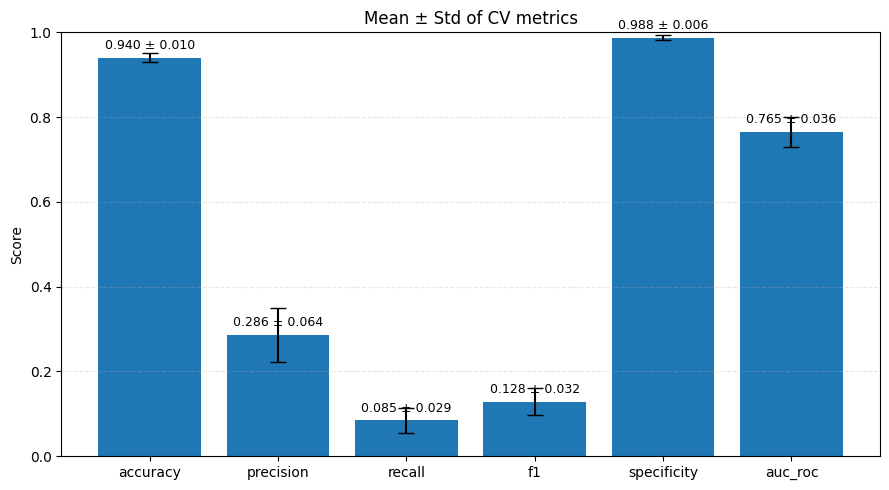

In [2]:
import matplotlib.pyplot as plt

# metrics to summarize
metrics = ["accuracy", "precision", "recall", "f1", "specificity", "auc_roc"]
metrics = [m for m in metrics if m in df.columns]  # keep only available

# compute mean and std
means = df[metrics].mean()
stds = df[metrics].std()

# plot
fig, ax = plt.subplots(figsize=(9, 5))
ax.bar(metrics, means, yerr=stds.values, capsize=6, color="C0")
ax.set_ylim(0, 1)
ax.set_ylabel("Score")
ax.set_title("Mean ± Std of CV metrics")
ax.grid(axis="y", linestyle="--", alpha=0.3)

# annotate values
for i, m in enumerate(metrics):
    ax.text(i, means[m] + 0.02, f"{means[m]:.3f} ± {stds[m]:.3f}", ha="center", fontsize=9)

plt.tight_layout()
plt.show()

In [6]:
import h5py
import numpy as np
from pathlib import Path
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score
)

# Provide these (examples):
H5_PATH = Path(r"t:\users\altp\data\embeddings\thyroid_embeddings.h5")
EMB_KEY = "embeddings"
LABEL_KEY = "metadata/has_invasion"
assert 'H5_PATH' in globals() and 'EMB_KEY' in globals() and 'LABEL_KEY' in globals(), \
    "Define H5_PATH, EMB_KEY, LABEL_KEY before running this cell."

H5_PATH = Path(H5_PATH)
with h5py.File(H5_PATH, "r") as f:
    print(f.keys())

    embeddings = f[EMB_KEY][()]
    labels = f[LABEL_KEY][()]

labels = np.array(labels).ravel()
if labels.dtype.type is np.bytes_:
    labels = labels.astype(str)

counts = pd.Series(labels).value_counts().sort_index()
display(counts)

majority = counts.idxmax()
pred = np.array([majority] * labels.shape[0])

acc = accuracy_score(labels, pred)
prec = precision_score(labels, pred, pos_label=majority, zero_division=0)
rec = recall_score(labels, pred, pos_label=majority, zero_division=0)
f1 = f1_score(labels, pred, pos_label=majority, zero_division=0)

specificity = None
unique = np.unique(labels)
if unique.size == 2:
    neg = unique[unique != majority][0]
    tn, fp, fn, tp = confusion_matrix(labels, pred, labels=[neg, majority]).ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float("nan")

auc = None
if unique.size == 2:
    y_true_bin = (labels == majority).astype(int)
    y_score = (pred == majority).astype(int)
    try:
        auc = roc_auc_score(y_true_bin, y_score)
    except Exception:
        auc = None

BASELINE_METRICS = {
    "majority_class": majority,
    "n_samples": int(len(labels)),
    "counts": counts.to_dict(),
    "accuracy": float(acc),
    "precision": float(prec),
    "recall": float(rec),
    "f1": float(f1),
    "specificity": (float(specificity) if specificity is not None else None),
    "auc_roc": (float(auc) if auc is not None else None),
}

print("Majority class baseline:", BASELINE_METRICS)

# expose for other cells
EMBEDDINGS = embeddings
LABELS = labels
H5_PATH


<KeysViewHDF5 ['embeddings', 'metadata', 'sample_codes']>


False    2062566
True       69213
Name: count, dtype: int64

Majority class baseline: {'majority_class': np.False_, 'n_samples': 2131779, 'counts': {False: 2062566, True: 69213}, 'accuracy': 0.9675327508151642, 'precision': 0.9675327508151642, 'recall': 1.0, 'f1': 0.9834984961895124, 'specificity': 0.0, 'auc_roc': 0.5}


WindowsPath('t:/users/altp/data/embeddings/thyroid_embeddings.h5')

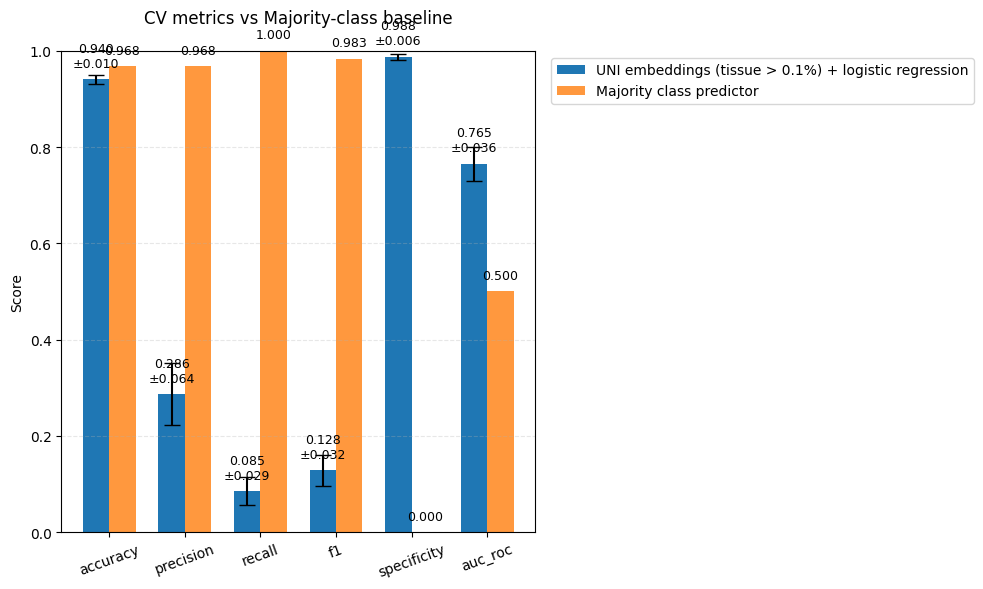

In [8]:
# Compare CV metrics (means ± std) with majority-class baseline
import numpy as np  # already available in the notebook but safe to reference

# metrics list is already defined in the notebook; use it
x = np.arange(len(metrics))
width = 0.35

# values for the CV model
cv_means = means[metrics].values
cv_stds = stds[metrics].values

# values for the majority-class baseline (pull from BASELINE_METRICS)
baseline_vals = np.array([float(BASELINE_METRICS.get(m, np.nan)) for m in metrics], dtype=float)

fig, ax = plt.subplots(figsize=(10, 6))
bars_cv = ax.bar(x - width/2, cv_means, width, yerr=cv_stds, capsize=6,
                 label="UNI embeddings (tissue > 0.1%) + logistic regression", color="C0")
bars_base = ax.bar(x + width/2, baseline_vals, width, label="Majority class predictor", color="C1", alpha=0.8)

ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=20)
ax.set_ylim(0, 1)
ax.set_ylabel("Score")
ax.set_title("CV metrics vs Majority-class baseline", pad=20)  # Add padding to offset title
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))  # Place legend outside axes
ax.grid(axis="y", linestyle="--", alpha=0.3)

# annotate bars
for i in range(len(metrics)):
    # CV annotation (mean ± std)
    ax.text(x[i] - width/2, cv_means[i] + 0.02, f"{cv_means[i]:.3f}\n±{cv_stds[i]:.3f}",
            ha="center", va="bottom", fontsize=9)
    # Baseline annotation
    val = baseline_vals[i]
    if not np.isnan(val):
        ax.text(x[i] + width/2, val + 0.02, f"{val:.3f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


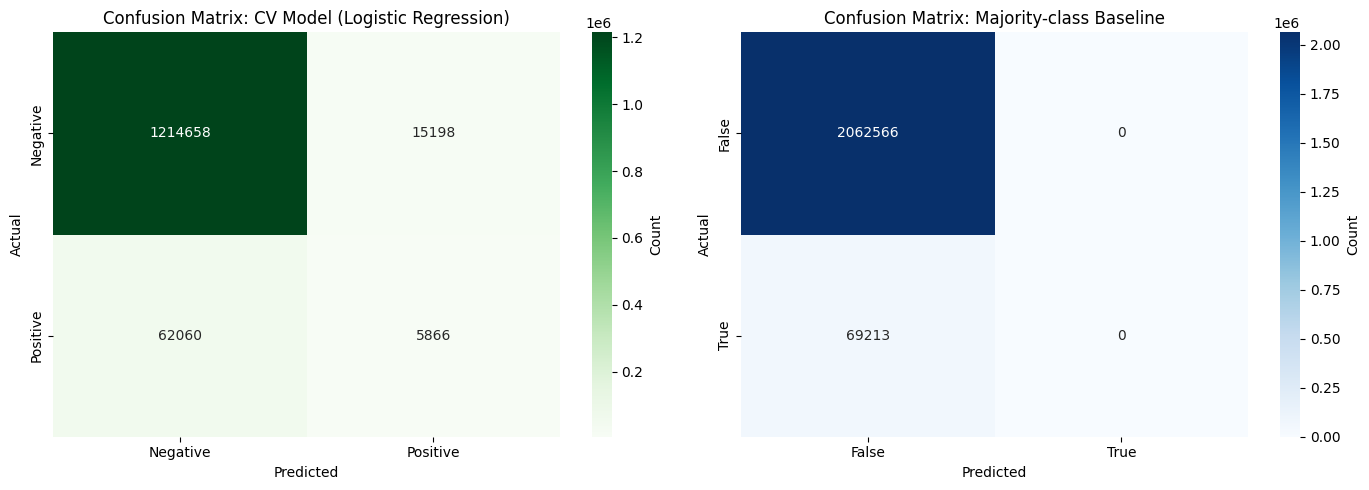

CV Model Confusion Matrix (aggregated across folds):
  TN=1214658, FP=15198
  FN=62060, TP=5866
  Total samples: 1297782

Baseline Confusion Matrix:
Labels: [False  True]
[[2062566       0]
 [  69213       0]]
Majority class: False
Total samples: 2131779


In [11]:
# Compute and display confusion matrices for both experiments
from sklearn.metrics import confusion_matrix
import seaborn as sns

# CV Model confusion matrix from aggregated TN, TP, FN, FP
# Average across folds to get the typical confusion matrix
required_cols = ['true_negatives', 'true_positives', 'false_negatives', 'false_positives']
if all(col in df.columns for col in required_cols):
    # Aggregate across folds (sum to get total counts)
    tn_cv = int(df['true_negatives'].sum())
    tp_cv = int(df['true_positives'].sum())
    fn_cv = int(df['false_negatives'].sum())
    fp_cv = int(df['false_positives'].sum())
    
    # Construct confusion matrix: [[TN, FP], [FN, TP]]
    cm_cv = np.array([[tn_cv, fp_cv],
                      [fn_cv, tp_cv]])
    
    # Labels for confusion matrix (binary classification)
    cm_labels = ['Negative', 'Positive']
else:
    cm_cv = None
    print("Warning: TN/TP/FN/FP columns not found in CSV")

# Baseline confusion matrix
unique_labels = np.unique(LABELS)
majority_class = BASELINE_METRICS["majority_class"]
baseline_predictions = np.array([majority_class] * len(LABELS))

cm_baseline = confusion_matrix(LABELS, baseline_predictions, labels=unique_labels)

# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# CV Model confusion matrix
if cm_cv is not None:
    sns.heatmap(cm_cv, annot=True, fmt='d', cmap='Greens', 
                xticklabels=cm_labels, yticklabels=cm_labels,
                ax=axes[0], cbar_kws={'label': 'Count'})
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')
    axes[0].set_title('Confusion Matrix: CV Model (Logistic Regression)')
else:
    axes[0].text(0.5, 0.5, 'CV confusion matrix\ndata not available',
                 ha='center', va='center', transform=axes[0].transAxes)
    axes[0].set_title('CV Model')
    axes[0].axis('off')

# Baseline confusion matrix
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues', 
            xticklabels=unique_labels, yticklabels=unique_labels,
            ax=axes[1], cbar_kws={'label': 'Count'})
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Confusion Matrix: Majority-class Baseline')

plt.tight_layout()
plt.show()

# Print summary
if cm_cv is not None:
    print("CV Model Confusion Matrix (aggregated across folds):")
    print(f"  TN={tn_cv}, FP={fp_cv}")
    print(f"  FN={fn_cv}, TP={tp_cv}")
    print(f"  Total samples: {tn_cv + tp_cv + fn_cv + fp_cv}")

print("\nBaseline Confusion Matrix:")
print(f"Labels: {unique_labels}")
print(cm_baseline)
print(f"Majority class: {majority_class}")
print(f"Total samples: {len(LABELS)}")
